<a href="https://colab.research.google.com/github/naokityokoyama/Projeto_extra_desafios/blob/main/desafio_junto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install shap

     |████████████████████████████████| 358kB 6.5MB/s 
  Created wheel for shap: filename=shap-0.39.0-cp37-cp37m-linux_x86_64.whl size=491632 sha256=e34d1440093607895782e790b032e00f0229f7d974a3547bf5f552bc06eb18a2
  Stored in directory: /root/.cache/pip/wheels/15/27/f5/a8ab9da52fd159aae6477b5ede6eaaec69fd130fa0fa59f283
Successfully built shap


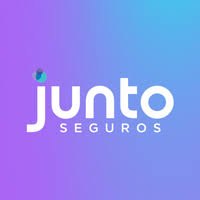

## Desafio Vaga Cientista de Dados

## Autor: Naoki Yokoyama

## Data 20/05/2021

**Contexto**

De acordo com a Organização Mundial da Saúde (OMS), o AVC é a 2ª causa de morte no mundo, responsável por aproximadamente 11% do total de mortes.
Este conjunto de dados é usado para prever se um paciente tem probabilidade de desenvolver AVC com base nos parâmetros de entrada como sexo, idade, várias doenças e tabagismo. Cada linha dos dados fornece informações relevantes sobre o paciente.

**Informação de Atributo**

1) id: identificador único

2) sexo: "Masculino", "Feminino" ou "Outro"

3) idade: idade do paciente

4) hipertensão: 0 se o paciente não tiver hipertensão, 1 se o paciente tiver hipertensão

5 ) doença cardiaca: 0 se o paciente não tiver nenhuma doença cardíaca, 1 se o paciente tiver uma doença cardíaca

6) casado: "Não" ou "Sim"

7) tipo trabalho: "filhos", "Govt_jov", "Never_worked", "Particular" ou "Autônomo"

8) tipo residencia: "Rural" ou "Urbano"

9) glicose media: nível médio de glicose no sangue

10) bmi: índice de massa corporal

11) fumante: "anteriormente fumado", "nunca fumado", "fuma"ou "Desconhecido" *

12) AVC: 1 se o paciente teve um AVC ou 0 se não
* Nota: "Desconhecido" em smoking_status significa que a informação não está disponível para este paciente

**Reconhecimentos**

(Fonte confidencial) - Use apenas para fins educacionais.
Se você usar este conjunto de dados em sua pesquisa, dê os créditos ao autor.

### 1- Insert database
<a id='priemira'></a>

Bibliotecas

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.dummy import DummyRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
import pickle
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report

### 2- analise exploratoria

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/naokityokoyama/Projeto_extra/main/dados_avc.csv')

In [ ]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
df.shape

(5110, 12)

In [ ]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [ ]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [ ]:
lista = ['age','hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']

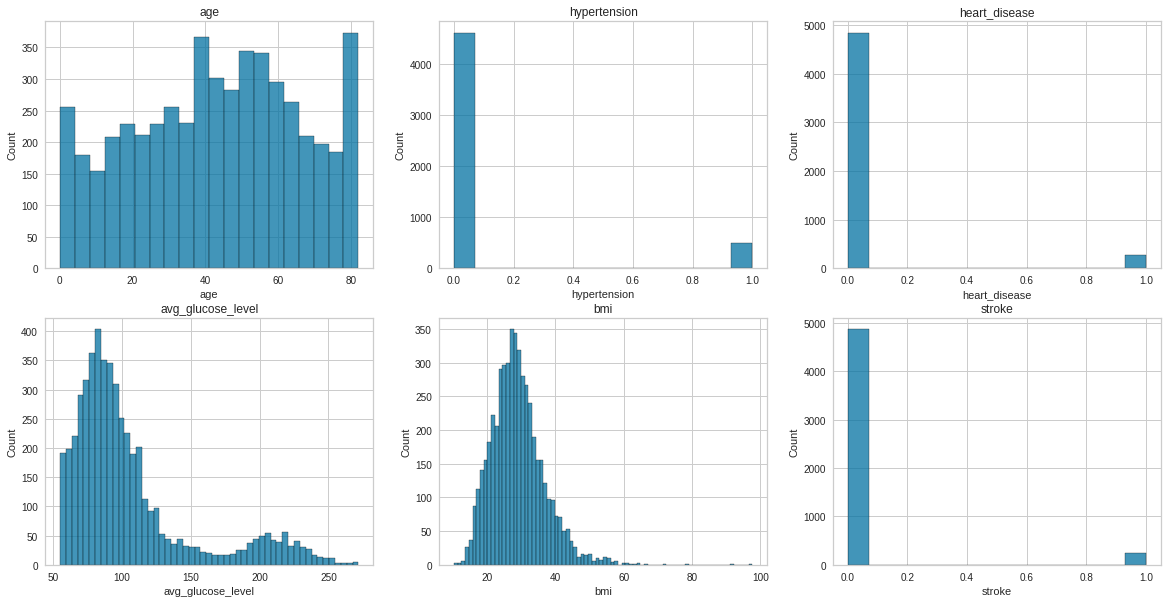

In [ ]:
plt.figure(figsize=(20,10))
for i, j in enumerate(lista):

  plt.subplot(2,3,i+1)
  sns.histplot(df[j])
  plt.title(j)
  

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data

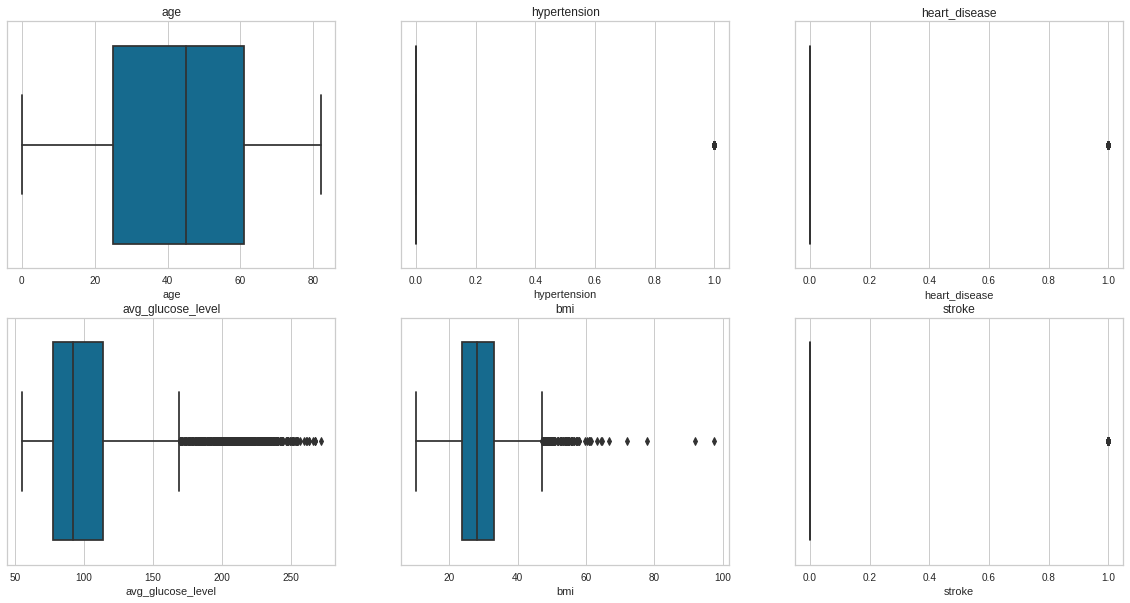

In [ ]:
plt.figure(figsize=(20,10))
for i, j in enumerate(lista):

  plt.subplot(2,3,i+1)
  sns.boxplot(df[j])
  plt.title(j)

In [ ]:
df_categoricas = df[['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']]
df_categoricas

,gender,ever_married,work_type,Residence_type,smoking_status
0,Male,Yes,Private,Urban,formerly smoked
1,Female,Yes,Self-employed,Rural,never smoked
2,Male,Yes,Private,Rural,never smoked
3,Female,Yes,Private,Urban,smokes
4,Female,Yes,Self-employed,Rural,never smoked
...,...,...,...,...,...
5105,Female,Yes,Private,Urban,never smoked
5106,Female,Yes,Self-employed,Urban,never smoked
5107,Female,Yes,Self-employed,Rural,never smoked
5108,Male,Yes,Private,Rural,formerly smoked


In [ ]:
lista2 = ['gender', 'ever_married', 'Residence_type', 'work_type', 'smoking_status']

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data

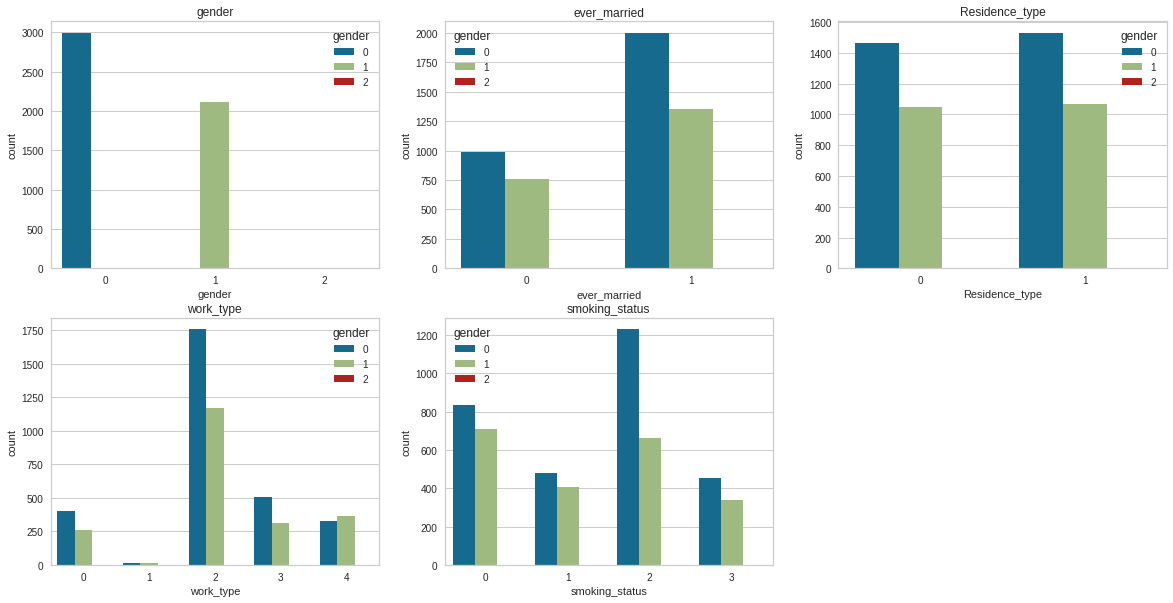

In [ ]:
plt.figure(figsize=(20,10))
for i, j in enumerate(lista2):
  plt.subplot(2,3,i+1)
  sns.countplot(df[j], hue=df['gender'])
  plt.title(j)

### Resumo de analise exploratoria
*    Base de dados desbalanceada (temos 4861 pessoas não tiveram AVC e 249 tiveram AVC)

*    Tambem desbalanceamento na coluna hypertension e heart_disease

*    Poucos dados faltantes 

*    Tamanho da base com 5110 instancias e 12 variaveis (sendo uma alvo e outra ID)

*    Base da dados com informação de genero, idade e local de moradia (rural e urbano)

*    Temos muito outliers nas colunas (avg_glucose_level e bmi) 

*    coluna idade tende a normal 







Substituindo dados Faltantes
vamos fazer uma regressao para substituir os dados faltantes

In [ ]:
ever_married = {'Yes':1, 'No':0}
df_dropna = df.dropna()
df_dropna = df_dropna.drop('id', axis=1)

In [ ]:
df_dropna['ever_married'] = df_dropna['ever_married'].map(ever_married)

In [ ]:
df_dropna.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,1,Private,Urban,228.69,36.6,formerly smoked,1
2,Male,80.0,0,1,1,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,1,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,1,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81.0,0,0,1,Private,Urban,186.21,29.0,formerly smoked,1


In [ ]:
label = LabelEncoder()
df_dropna['work_type'] = label.fit_transform(df_dropna['work_type'])
df_dropna['smoking_status'] = label.fit_transform(df_dropna['smoking_status'])
df_dropna['Residence_type'] = label.fit_transform(df_dropna['Residence_type'])
df_dropna['gender'] = label.fit_transform(df_dropna['gender'])

In [ ]:
df_dropna.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.6,1,1
2,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,0,79.0,1,0,1,3,0,174.12,24.0,2,1
5,1,81.0,0,0,1,2,1,186.21,29.0,1,1


In [ ]:
X_dropna = df_dropna.drop('bmi', axis=1)
y_dropna = df_dropna.bmi

In [ ]:
X_train_, X_test_, y_train_, y_test_ = train_test_split(X_dropna, y_dropna, test_size=0.2, random_state=42)

In [ ]:
def regressao(estimador):
  modelo = estimador
  modelo.fit(X_train_, y_train_)
  return modelo.score(X_train_, y_train_), modelo.score(X_test_, y_test_)

In [ ]:
print (f'o Random Forest foi {regressao(RandomForestRegressor())}')
print (f'a Regressao Linear foi {regressao(LinearRegression())}')
print (f'o modelo Dummy foi {regressao(DummyRegressor())}')

o Random Forest foi (0.8850334109115012, 0.17702175321774516)
a Regressao Linear foi (0.20030929327023406, 0.16332311564596036)
o modelo Dummy foi (0.0, -0.0016457153756548326)


Mas podemos observa que mesmo a base desbalanceada usar o Random Forest foi mais acertivo do que apenas substituir pela media pois o modelo Dummy ficou bem ruim o resultado

In [ ]:
#inserindo a predição nos valores faltantes BMI
df_faltante = df[df['bmi'].isnull()]

ever_married = {'Yes':1, 'No':0}
df_faltante['ever_married'] = df_faltante['ever_married'].map(ever_married)
df_faltante['work_type'] = label.fit_transform(df_faltante['work_type'])
df_faltante['smoking_status'] = label.fit_transform(df_faltante['smoking_status'])
df_faltante['Residence_type'] = label.fit_transform(df_faltante['Residence_type'])
df_faltante['gender'] = label.fit_transform(df_faltante['gender'])
df_faltante = df_faltante.drop(['id', 'bmi'], axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

In [ ]:
#predição
random = RandomForestRegressor()
random.fit(X_train_, y_train_)
random_pred = random.predict(df_faltante)
df_faltante_index = df_faltante.index

In [ ]:
#substituindo a predição por dados faltantes
for i , j in zip(range(len(random_pred)), df_faltante_index):
  df['bmi'][j] = random_pred[i]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Convertendo a base para modelagem 

In [ ]:
X1 = df

In [ ]:
X1 = pd.get_dummies(X1['gender'])

In [ ]:
X1 = X1.drop('Other', axis=1)

In [ ]:
X1 = pd.concat([df, X1], axis=1)
X1

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Female,Male
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600,formerly smoked,1,0,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,36.319,never smoked,1,1,0
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500,never smoked,1,0,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400,smokes,1,1,0
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000,never smoked,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,27.653,never smoked,0,1,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000,never smoked,0,1,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600,never smoked,0,1,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600,formerly smoked,0,0,1


In [ ]:
X1 = X1.drop(['id', 'gender', 'stroke'], axis=1)

### 3 - A Variavel Alvo é quem teve ou nao AVC

In [ ]:
y = df['stroke']

Transformando a base em numerica

In [ ]:
ever_married = {'Yes':1, 'No':0}
X1['ever_married'] = X1['ever_married'].map(ever_married)

X1['work_type'] = label.fit_transform(X1['work_type'])
X1['smoking_status'] = label.fit_transform(X1['smoking_status'])
X1['Residence_type'] = label.fit_transform(X1['Residence_type'])


In [ ]:
X = X1

### 4- Grafico de Dispersão com as variavel AVC sendo 1 vermelho e 0 azul

In [ ]:
pca = PCA(n_components=2)
pcaX = pca.fit_transform(X)

In [ ]:
pdy = pd.DataFrame(y)
pdy = pdy.reset_index()

In [ ]:
pdx = pd.DataFrame(pcaX)

In [ ]:
df_PCA = pd.concat([pdx, pdy], axis=1).drop('index', axis=1)
df_PCA = df_PCA.rename(columns={0:'primeira', 1:'segunda', 'stroke':'avc'})
df_PCA

,primeira,segunda,avc
0,124.935317,-4.944946,1
1,97.853080,-3.179234,1
2,5.561660,-36.516297,1
3,65.351334,3.912537,1
4,72.443392,-23.856027,1
...,...,...,...
5105,-16.504715,-39.452941,0
5106,25.018727,-35.298890,0
5107,-24.073982,4.251986,0
5108,60.462226,2.195991,0


Text(0.5, 1.0, 'Grafico de dispercao')

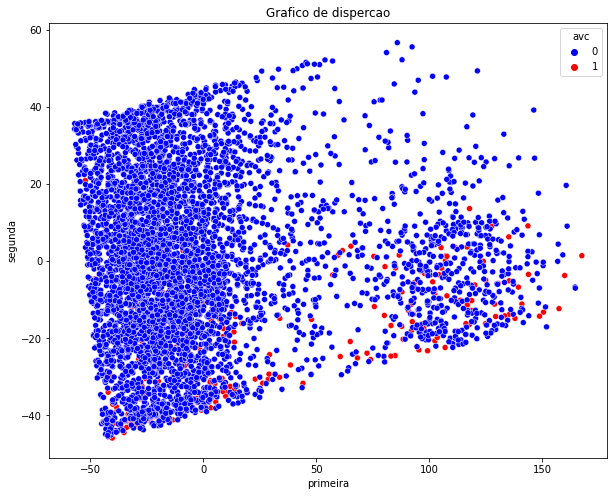

In [ ]:
plt.figure(figsize=(10,8))
palette ={0: "blue", 1: 'red'}
sns.scatterplot(data=df_PCA,x='primeira', y='segunda', hue='avc', palette=palette)
plt.title('Grafico de dispercao');

Colando a base na mesma escala

In [ ]:
stand = StandardScaler()
X = stand.fit_transform(X)

Balanceando a base

In [ ]:
sm = SMOTE(random_state=0)
X_res, y_res = sm.fit_resample(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


### 5 - decision tree

Treino e test separando com hold out

In [ ]:
X_train, X_test , y_train, y_test = train_test_split(X_res, y_res, test_size=0.25, random_state=42)

Modelagem arvore

In [ ]:
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

print (f'A acuracia da arvore de decisão do treino foi de {tree.score(X_train, y_train)} e de teste foi de {tree.score(X_test, y_test):.2f} ')

A acuracia da arvore de decisão do treino foi de 1.0 e de teste foi de 0.91 


In [ ]:
y_pred_tree = tree.predict(X_test)
recall_tree = recall_score(y_test, y_pred_tree)
acuracia_tree = accuracy_score(y_test,y_pred_tree)
print (f'O Recall da arvore foi de {recall_tree:.2f}')
print (f'A Acuracia da arvore foi de {acuracia_tree:.2f}')

O Recall da arvore foi de 0.92
A Acuracia da arvore foi de 0.91


In [ ]:
np.unique(y_pred_tree, return_counts=True)

(array([0, 1]), array([1195, 1236]))

### 6- Rede Neural Classifier

Como é uma questão de binaria usaremos a funcao de ativação Sigmoid pois ela funciona muito bem em casos binarios e usaremos a funcao de ativação Relu nas camadas ocultas 
Tambem faremos uma rede toda conectada e *sequencial*

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense

Temos 10 features nas entradas e 1 saida (pois queremos 0 ou 1 e não 0 e 1) 
então para camada de entrada temos 10 
para camada de saida temos 1 
e para camada intermediaria podemos fazer uma media 11 / 2 apx = 6 

Usarmos o Adam para optimizador com learning rating de 0.001 e decay de 0.00001 e clipvalue de 0.5

In [ ]:
def rede_neural_metrics(metrica, predicao=0):
  classificador = Sequential()
  classificador.add(Dense(units=12, activation='relu', kernel_initializer='random_uniform', input_dim=11))
  classificador.add(Dense(units=1, activation='sigmoid'))

  optimizador = keras.optimizers.Adam(lr=0.001, decay=0.0001, clipvalue=0.5)

  classificador.compile(optimizer=optimizador, loss='binary_crossentropy', metrics=[metrica])

  classificador.fit(X_train, y_train, batch_size=10, epochs=100)
  return classificador.evaluate(X_test, y_test)
  return classiicador.predict(predicao)

In [ ]:
rede_neural_metrics('Recall')

Epoch 1/100
730/730 [==============================] - 1s 1ms/step - loss: 0.5857 - recall: 0.8622
Epoch 2/100
730/730 [==============================] - 1s 1ms/step - loss: 0.4548 - recall: 0.8810
Epoch 3/100
730/730 [==============================] - 1s 1ms/step - loss: 0.4474 - recall: 0.8663
Epoch 4/100
730/730 [==============================] - 1s 1ms/step - loss: 0.4337 - recall: 0.8734
Epoch 5/100
730/730 [==============================] - 1s 1ms/step - loss: 0.4167 - recall: 0.8873
Epoch 6/100
730/730 [==============================] - 1s 1ms/step - loss: 0.4233 - recall: 0.8707
Epoch 7/100
730/730 [==============================] - 1s 1ms/step - loss: 0.4208 - recall: 0.8718
Epoch 8/100
730/730 [==============================] - 1s 1ms/step - loss: 0.4236 - recall: 0.8734
Epoch 9/100
730/730 [==============================] - 1s 1ms/step - loss: 0.4228 - recall: 0.8656
Epoch 10/100
730/730 [==============================] - 1s 1ms/step - loss: 0.4188 - recall: 0.8846
Epoch 11/

[0.4082373082637787, 0.8563171029090881]

### 7 - Outro modelo vamos fazer o Xgboost com Cross Validation

In [ ]:
gb = GradientBoostingClassifier()

In [ ]:
scoring = ['recall', 'accuracy']
kfold = KFold(n_splits=20, shuffle=True)
cross = cross_validate(gb, X, y, scoring=scoring, cv=kfold, return_estimator=True, return_train_score=True)
resultado_cross = cross['test_accuracy'].mean()
print (f'A Acuracia do Cross Validation foi de {resultado_cross}')

A Acuracia do Cross Validation foi de 0.9499034926470589


In [ ]:
cross['train_recall'].mean()

0.11139731532388257

Matrix de Confusão

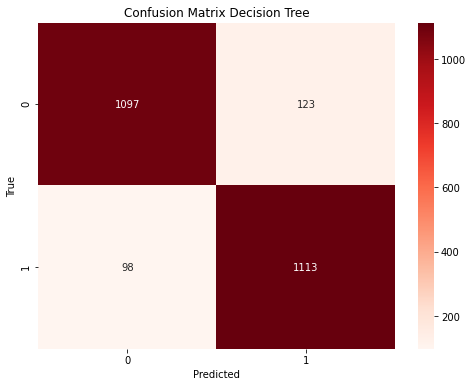

In [ ]:
plt.figure(figsize=(8,6),facecolor=(1, 1, 1))
cm = confusion_matrix(y_test, y_pred_tree)
sns.heatmap(cm, annot=True, fmt='g', cmap='Reds')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix Decision Tree');

### 8 - justificar a metrica 

O recall pode ser usada em uma situação em que os Falsos Negativos são considerados mais prejudiciais que os Falsos Positivos. Por exemplo, o modelo deve de qualquer maneira encontrar todos os pacientes doentes, mesmo que classifique alguns saudáveis como doentes (situação de Falso Positivo) no processo. Ou seja, o modelo deve ter alto recall, pois classificar pacientes doentes como saudáveis pode ser uma tragédia.

Então nesse caso a metrica escollhida deve ser o RECALL

### 9- Escolha um dos tres modelos acima. 

O modelo escolhido para esse caso foi a arvore de decisão simples, pois como o resultado ficou muito proximo das rede neurais o modelos de machine learning são mais faceis de ser implantandos, de manutenção e tambem tem um custo computacional muito menor comparando a rede neural

O Falso Negativo é muito importante pois se uma pessoa fala que tem AVC e na verdade não tem isso não tem problema pois a pessoa tem saude plena agora no caso do Falso Negativo é muito serio pois se um paciente é diagnosticado como não tem AVC e na verdade ele tem

No nosso case tivemos uma Acuracia de 91% e recall de 92% então o nosso limiar para esse caso é sem duvida o Recall e sua metrica foi de 92% e com isso podemos aceitar um erro no recall de até no maximo 10%

### 10 - Realize uma análise de "Equal Error Rate" e uma análise "SHAP" para o modelo a cima e descreva
###suas conclusões.

In [ ]:
X_shap = X1
y_shap = df.stroke

In [ ]:
pd.plotting.hist_series

In [ ]:
X_train_, X_test_ , y_train_, y_test_ = train_test_split(X_shap, y_shap, test_size=0.25, random_state=42, stratify=y)

In [ ]:
import shap
from sklearn.ensemble import RandomForestClassifier

In [ ]:
random_cls = RandomForestClassifier()
random_cls.fit(X_train_,y_train_)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

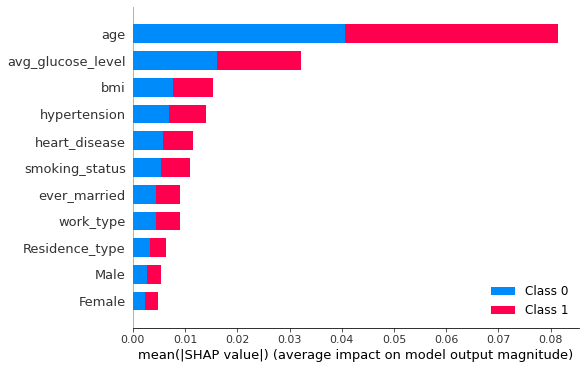

In [ ]:
explorer = shap.TreeExplainer(random_cls)
X_importance = X_test_
shap_values = explorer.shap_values(X_importance)
shap.summary_plot(shap_values, X_importance)

Dado a analise Shap podemos reparar com precisão quais features são de fato relevantes para nosso problema
pois alem do grau de importancia podemos reparar tambem na contrinuição de cada classe (0,1) com cada feature 
Com o Shap podemos de fato saber quais variaveis são importantes para nosso caso e assim realizar uma modelagem mais apropriada.

Com relação ao Equal Error Rate pude notar muita aplicabilidade em sistemas biometricos que está se falando tambem para o universo de machine learning que até ja possui uma library do python o pyerr porem como é um assunto novo para mim não pude disserta sobre essa metrica mas que já estou estudando sobre.

### 11 - Crie uma classe que carregue o modelo treinado do disco e tenha uma função de predição. A função de
### predição deve receber como parâmetro uma única amostra de dados e retorne o resultado de predição
### (0 ou 1) utilizando o limiar definido na questão 9. 


Para esse case o modelo que melhor se sair foi a arvore de decisão

In [ ]:
with open('tree.pkl', 'wb') as file:
  pickle.dump(tree, file)

In [ ]:
class model:
  def previsao(x):
    with open('tree.pkl', 'rb') as file:
      model = pickle.load(file)
      return model.predict(x)[0]

In [ ]:
amostra1 = X_train[830:831]
amostra2 = X_train[831:832]                  

In [ ]:
resultado_amostra1 = model.previsao(amostra1)
resultado_amostra2 = model.previsao(amostra2)

In [ ]:
print (f'A previsao da amostra 1 foi de {resultado_amostra1} e da amostra 2 foi de {resultado_amostra2}')

A previsao da amostra 1 foi de 1 e da amostra 2 foi de 0


### 12 - Disserte sobre como seria o modelo ideal para que o modelo gerado seja colocado em produção, de
### forma que possa ser utilizado para realizar predições em tempo real.

Nesse caso teriamos que testar mais alguns estimadores pois fizemos apenas 3 construção de modelos (1 arvore de decisão simples, 1 rede neural e 1 modelo de gradient buster em cross validation)
Embora acreditasse que o Modelo de cross validation se sairia melhor que um arvore simples em hold out 

Então podemos concluir que não precisamos gastar poder computacinal para criar uma rede neural visto que o modelo de arvore atendeu ao problema e que tambem não é necessario fazer uma validação cruzada 

O que vale a pena é testar outros estimadores no hold out e definir alguns huper parametros.

Esse modelo que foi salvo está atendendo bem ao problema agora seria interessante realizar um deploy para algum serviço SAAS mesmo como Heroku ou até mesmo algum cloud computer como AWS, GCP, etc

Colocando o serviço em Nuvem você terá acesso ao modelo em tempo real.

O que é interessante é realizar o Deploy diante de Ambiente Virtual e também utilizar o Docker para que possamos garantir a forma que o modelo se saiu nesse teste possa repetir a perfomace onde quer que ele esteja rodando.

### 13 - Escreva uma função que receba uma lista (array) de numeros inteiros e retorne um booleano (True ou
### False) indicando se a lista é monotônica. Para essa não é permitido o uso de nenhuma biblioteca,
### somente a linguagem Python com seus tipos nativos.
### def isMonotonic(A: List[int]) -> bool:


In [ ]:
def isMonotonic(*args):
  lista = [*args]
  [int(x) for x in lista]
  crescente = sorted(lista)
  decrescente = sorted(lista, reverse=True)
  if lista == crescente or lista == decrescente:
    return True
  else:
    return False

In [ ]:
isMonotonic(1.0,2.0, 3), isMonotonic(3.0, 2.0, 1), isMonotonic(4,2,7)

# Conclusão

A interessante problematica desse caso em detectar AVC é algo extremamente importante
Nesse desafio proposto fizemos a analise exploratoria e tratamos os dados nulos e tambem o desbalanceamento dos dados
substiuição de dados nulos, e criação de modelo preditivo.
Sabemos que nesse desafio existe muito onde melhorar como desde o tratamento dos dados faltantes, dos balanceamentos dos dados e até mesmo a criação do modelo preditivo (com escolha de outros estimadores, e hiper parametros) 
Mas o nosso resultado mostrou que o caminho iniciado nesse projeto é promissor.